In [43]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [9]:
df = pd.read_csv(r"C:\Users\admin\Downloads\SMSSpamCollection",sep='\t',header=0,names=['label','msg'])


In [10]:
df

,label,msg
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [11]:
df['len']=df['msg'].apply(len)

In [12]:
df

,label,msg,len
0,ham,Ok lar... Joking wif u oni...,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147
...,...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...,160
5567,ham,Will ü b going to esplanade fr home?,36
5568,ham,"Pity, * was in mood for that. So...any other s...",57
5569,ham,The guy did some bitching but I acted like i'd...,125


<AxesSubplot:>

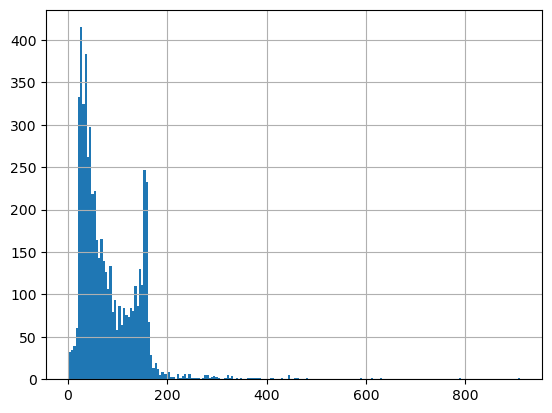

In [14]:
df['len'].hist(bins=200)

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

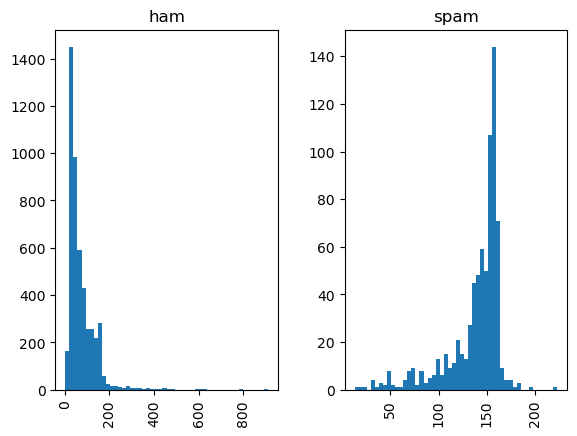

In [15]:
df.hist(bins=50,by='label',column='len')

In [17]:
df['len'].describe()

count    5571.000000
mean       80.484473
std        59.946894
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: len, dtype: float64

In [20]:
df[df['len']==910].iloc[0,1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

##EDA process

In [21]:
#1. punctuation removal
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
str1 = 'data science ==??"**'

In [23]:
str1

'data science ==??"**'

In [24]:
no_punc = [x for x in str1 if x not in string.punctuation]

In [25]:
no_punc

['d', 'a', 't', 'a', ' ', 's', 'c', 'i', 'e', 'n', 'c', 'e', ' ']

In [26]:
''.join(no_punc)

'data science '

In [27]:
from nltk.corpus import stopwords

In [28]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
def clean_words(title):
    no_punc = [x for x in title if x not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [ x for x in no_punc.split() if x.lower not in stopwords.words('english')]
    

In [30]:
clean_words('data sicyehfhud%^%#')

In [46]:
stem = PorterStemmer()
lem = WordNetLemmatizer()

In [40]:
sentence = 'this is a demo to check the function and to understand it understanding'

In [41]:
word = word_tokenize(sentence)

In [42]:
word

['this',
 'is',
 'a',
 'demo',
 'to',
 'check',
 'the',
 'function',
 'and',
 'to',
 'understand',
 'it',
 'understanding']

In [47]:
for i in word:
    print('{0:20}-{1:20}-{2:20}'.format(i,stem.stem(i),lem.lemmatize(i,pos='v')))

this                -thi                 -this                
is                  -is                  -be                  
a                   -a                   -a                   
demo                -demo                -demo                
to                  -to                  -to                  
check               -check               -check               
the                 -the                 -the                 
function            -function            -function            
and                 -and                 -and                 
to                  -to                  -to                  
understand          -understand          -understand          
it                  -it                  -it                  
understanding       -understand          -understand          
